<a href="https://colab.research.google.com/github/antoniocfetngnu/InteligArtificial1/blob/main/laboratorios/laboratorio1/laboratorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1 Inteligencia Artificial I
## Nombre: Calderon Flores Enrique Antonio
## Carrera: Ing. En Ciencias de la Computación


# 1er Dataset: 10. Hitters Salary

Se quiere predecir el salario de los hitters de baseball


## Elección de modelo: Clasificación multiclase OneVsAll
Analizando el dataset se puede concluir claramente que se quiere realizar una clasificación múltiple entre distintos tiposs de malware o si la aplicación es benigna. Ya que se tiene 4 categorías discretas, se debe emplear una clasifiación.

###Importacion de librerías

Primero importamos todas las librerías que necesitamos

In [85]:
import pandas as pd
import numpy as np
from scipy import optimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
%matplotlib inline

Ahora importamos el dataset como dataframe de pandas

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Hitters_Adjusted_Salary.csv',index_col=0)

Reemplazo de espacios en blanco por guiones bajos en nombre de columnas para evitar errores.

## Preprocesado y Optimización
Se incluyó low_memory= False como parámetro en la importación del Dataset ya que nos indicaba que hay columnas que tienen más de un tipo de dato.

Columas con problemas (multiples datos) ['Flow_ID', '_CWE_Flag_Count', '_Down/Up_Ratio', 'Fwd_Avg_Bytes/Bulk']

###Eliminación de valores nulos NAN de dataset

In [88]:
df = df.dropna()

In [89]:
pd.set_option('display.max_columns', None)
print(df.head())

   yearID   playerID   salary    ADJ Salary     GS  InnOuts   PO    A     E  \
0    1985  benedbr01   545000  1.310892e+06   67.0   1698.0  314   35   4.0   
1    1985  ceronri01   625000  1.503317e+06   76.0   2097.0  384   48   6.0   
2    1985  chambch01   800000  1.924245e+06   27.0    814.0  299   25   1.0   
3    1985  harpete01   250000  6.013267e+05  124.0   3299.0  215   10   5.0   
4    1985  hornebo01  1500000  3.607960e+06  125.0   3196.0  917  119  11.0   

    DP teamID lgID    G   AB   R    H  2B  3B  HR   RBI   SB   CS  BB    SO  \
0    1    ATL   NL   70  208  12   42   6   0   0  20.0  0.0  1.0  22  12.0   
1    4    ATL   NL   96  282  15   61   9   0   3  25.0  0.0  3.0  29  25.0   
2   31    ATL   NL  101  170  16   40   7   0   3  21.0  0.0  0.0  18  22.0   
3    0    ATL   NL  138  492  58  130  15   2  17  72.0  9.0  9.0  44  76.0   
4  111    ATL   NL  130  483  61  129  25   3  27  89.0  1.0  1.0  50  57.0   

   IBB  HBP   SH   SF  GIDP  
0  1.0  1.0  4.0  2.

###Eliminación de columnas de ID o relacionadas
Debido a que sus valores son únicos y no indican una escala de valores que tenga una relación ordinal o incremental

In [90]:
df = df.drop('playerID', axis=1)
df = df.drop('teamID', axis=1)
df = df.drop('lgID', axis=1)

In [91]:
# Calcular la matriz de correlación
correlacion = df.corr()

# Mostrar la matriz de correlación
print(correlacion)


              yearID    salary  ADJ Salary        GS   InnOuts        PO  \
yearID      1.000000  0.369781    0.294552  0.053712  0.054077  0.032170   
salary      0.369781  1.000000    0.986739  0.310427  0.296319  0.202047   
ADJ Salary  0.294552  0.986739    1.000000  0.340543  0.324884  0.221851   
GS          0.053712  0.310427    0.340543  1.000000  0.997493  0.517505   
InnOuts     0.054077  0.296319    0.324884  0.997493  1.000000  0.517253   
PO          0.032170  0.202047    0.221851  0.517505  0.517253  1.000000   
A           0.013986  0.063393    0.070193  0.501796  0.504719  0.011896   
E          -0.081280  0.049576    0.068595  0.590649  0.590732  0.163747   
DP          0.029659  0.148798    0.161187  0.494896  0.495804  0.502775   
G           0.015351  0.242130    0.268214  0.802621  0.807989  0.439860   
AB          0.039775  0.310687    0.341030  0.875803  0.873533  0.462280   
R           0.027867  0.334038    0.374673  0.823447  0.820176  0.417419   
H           

In [92]:
# df = df.drop('ADJ Salary', axis=1)

In [93]:
df = df.drop(df[df['salary'] < 0].index)
df = df.drop(df[df['ADJ Salary'] < 0].index)

In [94]:
print(df.head())

   yearID   salary    ADJ Salary     GS  InnOuts   PO    A     E   DP    G  \
0    1985   545000  1.310892e+06   67.0   1698.0  314   35   4.0    1   70   
1    1985   625000  1.503317e+06   76.0   2097.0  384   48   6.0    4   96   
2    1985   800000  1.924245e+06   27.0    814.0  299   25   1.0   31  101   
3    1985   250000  6.013267e+05  124.0   3299.0  215   10   5.0    0  138   
4    1985  1500000  3.607960e+06  125.0   3196.0  917  119  11.0  111  130   

    AB   R    H  2B  3B  HR   RBI   SB   CS  BB    SO  IBB  HBP   SH   SF  \
0  208  12   42   6   0   0  20.0  0.0  1.0  22  12.0  1.0  1.0  4.0  2.0   
1  282  15   61   9   0   3  25.0  0.0  3.0  29  25.0  1.0  1.0  0.0  4.0   
2  170  16   40   7   0   3  21.0  0.0  0.0  18  22.0  4.0  0.0  0.0  1.0   
3  492  58  130  15   2  17  72.0  9.0  9.0  44  76.0  4.0  3.0  1.0  2.0   
4  483  61  129  25   3  27  89.0  1.0  1.0  50  57.0  4.0  1.0  0.0  6.0   

   GIDP  
0   8.0  
1  15.0  
2   5.0  
3  13.0  
4  18.0  


In [95]:
nans_por_celda = df.isna().isna()

print("NaN por celda:")
print(nans_por_celda)

NaN por celda:
       yearID  salary  ADJ Salary     GS  InnOuts     PO      A      E     DP  \
0       False   False       False  False    False  False  False  False  False   
1       False   False       False  False    False  False  False  False  False   
2       False   False       False  False    False  False  False  False  False   
3       False   False       False  False    False  False  False  False  False   
4       False   False       False  False    False  False  False  False  False   
...       ...     ...         ...    ...      ...    ...    ...    ...    ...   
15018   False   False       False  False    False  False  False  False  False   
15019   False   False       False  False    False  False  False  False  False   
15020   False   False       False  False    False  False  False  False  False   
15021   False   False       False  False    False  False  False  False  False   
15022   False   False       False  False    False  False  False  False  False   

           G

Como se puede observar se aplicó correctamente el preprocesamiento y ya no tenemos NANs en las columnas

#Separación en entrenamiento y prueba
Ahora, con el dataset listo, debemos separar los datos de manera coherente
##Tomar el 20% de los datos de cada ocurrencia en Y(label)
Entonces, utilizando train_test_split con stratify y test_size=0.2 aseguramos que se tome el 20% de cada ocurrencia en Y, además la semilla aleatoria es 42, por si quisieramos replicar la pseudo aleatorieadad al correr nuevamente el código.

In [96]:
y1 = df['salary']
X1 = df.drop(columns=['salary'])

print(X1.head())
print('-'*20)
print(y1.head())

   yearID    ADJ Salary     GS  InnOuts   PO    A     E   DP    G   AB   R  \
0    1985  1.310892e+06   67.0   1698.0  314   35   4.0    1   70  208  12   
1    1985  1.503317e+06   76.0   2097.0  384   48   6.0    4   96  282  15   
2    1985  1.924245e+06   27.0    814.0  299   25   1.0   31  101  170  16   
3    1985  6.013267e+05  124.0   3299.0  215   10   5.0    0  138  492  58   
4    1985  3.607960e+06  125.0   3196.0  917  119  11.0  111  130  483  61   

     H  2B  3B  HR   RBI   SB   CS  BB    SO  IBB  HBP   SH   SF  GIDP  
0   42   6   0   0  20.0  0.0  1.0  22  12.0  1.0  1.0  4.0  2.0   8.0  
1   61   9   0   3  25.0  0.0  3.0  29  25.0  1.0  1.0  0.0  4.0  15.0  
2   40   7   0   3  21.0  0.0  0.0  18  22.0  4.0  0.0  0.0  1.0   5.0  
3  130  15   2  17  72.0  9.0  9.0  44  76.0  4.0  3.0  1.0  2.0  13.0  
4  129  25   3  27  89.0  1.0  1.0  50  57.0  4.0  1.0  0.0  6.0  18.0  
--------------------
0     545000
1     625000
2     800000
3     250000
4    1500000
Name: s

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [98]:
print('X_train(LENGHT):',len(X_train))
print('y_train(LENGHT):',len(y_train))
print('X_test(LENGHT):',len(X_test))
print('y_test(LENGHT):',len(y_test))

print('------------')
print(X_train.head())
print('------------')
print(y_train.head())

X_train(LENGHT): 12018
y_train(LENGHT): 12018
X_test(LENGHT): 3005
y_test(LENGHT): 3005
------------
       yearID    ADJ Salary     GS  InnOuts   PO    A    E  DP    G   AB   R  \
12945    2012  2.649049e+06   66.0   1762.0  153    2  0.0   1  122  289  44   
5729     1997  1.290024e+06   99.0   2591.0  217   12  2.0   2  103  378  44   
3559     1993  8.955398e+05   39.0    895.0   79    4  3.0   1   65  129  19   
2766     1991  4.750569e+06  138.0   3625.0  362   10  1.0   2  150  572  86   
9338     2004  4.213043e+05   48.0   1274.0   93  143  6.0  31   53  220  33   

         H  2B  3B  HR   RBI    SB   CS  BB     SO  IBB  HBP   SH   SF  GIDP  
12945   69   5   3   3  16.0  12.0  5.0  20   63.0  0.0  6.0  7.0  0.0   4.0  
5729    93  18   4  15  51.0   5.0  3.0  30   92.0  2.0  3.0  0.0  2.0  13.0  
3559    33  10   1   6  19.0   2.0  0.0  15   34.0  2.0  1.0  1.0  2.0   2.0  
2766   158  33   0  25  85.0   6.0  6.0  58  113.0  3.0  4.0  1.0  2.0   9.0  
9338    56  16   2   2 

In [99]:
X_tr = X_train.values
y_tr= y_train.values

In [100]:
m=y_tr.size
n = X_tr.shape[0]
print(m,n)

12018 12018


In [101]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [102]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_tr)

print(X_tr)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.01200000e+03 2.64904941e+06 6.60000000e+01 ... 7.00000000e+00
  0.00000000e+00 4.00000000e+00]
 [1.99700000e+03 1.29002368e+06 9.90000000e+01 ... 0.00000000e+00
  2.00000000e+00 1.30000000e+01]
 [1.99300000e+03 8.95539792e+05 3.90000000e+01 ... 1.00000000e+00
  2.00000000e+00 2.00000000e+00]
 ...
 [1.99600000e+03 1.97943403e+05 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.98700000e+03 2.37698994e+06 1.49000000e+02 ... 3.00000000e+00
  9.00000000e+00 1.50000000e+01]
 [2.00000000e+03 2.63019309e+06 9.30000000e+01 ... 4.00000000e+00
  8.00000000e+00 1.20000000e+01]]
Media calculada: [2.00068888e+03 2.99534393e+06 7.75356132e+01 2.07135821e+03
 2.52615826e+02 8.76960393e+01 5.73889166e+00 2.30725578e+01
 9.11258113e+01 2.93608005e+02 4.02248294e+01 7.83981528e+01
 1.51711599e+01 1.69379264e+00 8.84972541e+00 3.82743385e+01
 5.85014145e+00 2.49800300e+00 2.91052588e+01 5.33439008e+01
 2.44025628e+00 2.68838409e+00 1.85263771e+00 2.52046930e+00
 6.71709103e+00]


In [103]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X_tr = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [104]:
print(X_tr)

[[ 1.          1.26111232 -0.0779953  ...  1.81682732 -1.01318442
  -0.49037091]
 [ 1.         -0.41128532 -0.38408626 ... -0.65391216 -0.20921952
   1.13391702]
 [ 1.         -0.85725803 -0.47293516 ... -0.30094938 -0.20921952
  -0.85132378]
 ...
 [ 1.         -0.5227785  -0.63005356 ... -0.65391216 -0.61120197
  -1.21227665]
 [ 1.         -1.52621708 -0.13927077 ...  0.40497619  2.60465763
   1.49486989]
 [ 1.         -0.07680579 -0.08224228 ...  0.75793897  2.20267518
   0.95344059]]


In [105]:
m=y_tr.size
n = X_tr.shape[0]
print(m,n)

12018 12018


In [106]:
def computeCostMultiReg(X_tr, y_tr, theta, lambda_reg):
    # Inicializa algunos valores útiles
    m = y_tr.shape[0]  # numero de ejemplos de entrenamiento

    # Calcula la hipótesis
    h = np.dot(X_tr, theta)

    # Calcula el error cuadrático medio
    mse = (1 / (2 * m)) * np.sum(np.square(h - y_tr))

    # Calcula el término de regularización
    regularization_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))

    # Calcula la función de costo regularizada
    J = mse + regularization_term

    return J

In [107]:
def gradientDescentMultiReg(X, y, theta, alpha, num_iters, lambda_reg):
    # Inicializa algunos valores
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        # Calcula la hipótesis
        h = np.dot(X, theta)

        # Actualiza los parámetros theta excluyendo el término de intercepción (theta_0)
        theta[1:] = theta[1:] - (alpha / m) * ((h - y).dot(X[:, 1:]) + lambda_reg * theta[1:])

        # Actualiza el término de intercepción (theta_0) sin regularización
        theta[0] = theta[0] - (alpha / m) * np.sum(h - y)

        # Calcula el costo regularizado y lo agrega al historial
        J_history.append(computeCostMultiReg(X, y, theta, lambda_reg))

    return theta, J_history

theta calculado por el descenso por el gradiente con regularizacion: [ 2.24670759e+06  3.12947865e+05  3.40136646e+06  3.70988440e+02
  3.02957050e+03 -2.92022359e+04 -1.54949625e+04 -2.16647600e+04
  3.84199314e+04  2.14935809e+04  6.52452910e+04 -7.16702308e+04
  3.36090313e+04  3.84865564e+03 -2.03211725e+04 -4.50274642e+04
 -5.23571572e+04 -3.53458855e+03 -2.14271139e+04 -4.72098708e+04
  9.42883909e+04 -1.58041098e+04 -1.09775894e+04 -1.89062693e+04
 -2.20969199e+04  2.02121421e+04]


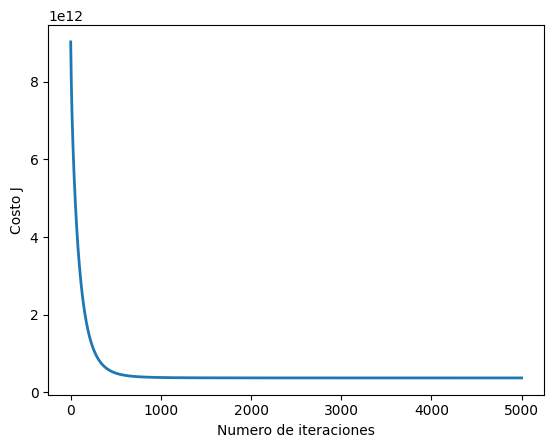

In [118]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.005 # alpha = 0.003
num_iters = 5000
lambda_reg=500
# inicializa theta y ejecuta el descenso por el gradiente
thetaR = np.zeros(X_tr.shape[1])
thetaR, J_historyR = gradientDescentMultiReg(X_tr, y_tr, thetaR, alpha, num_iters,lambda_reg)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historyR)), J_historyR, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente con regularizacion: {:s}'.format(str(thetaR)))

In [119]:
X_tst = X_test.values
y_tst= y_test.values

In [120]:
X_tstNorm = (X_tst - mu) / sigma

In [121]:
print(X_tstNorm)

[[ 0.59215327 -0.29874808  1.34407593 ... -0.65391216  1.39871028
   0.77296415]
 [ 0.36916691  0.17397036  0.2969742  ...  0.0520134  -1.01318442
  -1.03180022]
 [-0.9687512  -0.45651013 -1.26341269 ...  0.40497619 -1.01318442
  -1.03180022]
 ...
 [-1.63771026 -0.59219814 -0.42162502 ... -0.30094938 -0.20921952
  -0.30989447]
 [ 1.70708503  2.15889808 -1.24288128 ... -0.65391216 -0.20921952
   1.13391702]
 [ 1.3726055  -0.55077489 -0.77065893 ...  0.0520134  -0.61120197
  -1.21227665]]


In [122]:
X_tst1Sesgo = np.concatenate([np.ones((y_tst.shape[0], 1)), X_tstNorm], axis=1)
print(X_tst1Sesgo[:5])

[[ 1.          0.59215327 -0.29874808  1.34407593  1.39549021  0.14768595
  -0.59610029 -0.13302512 -0.51636476  1.24691318  1.3781021   1.98727334
   1.42034426  2.18862148  1.46913537  1.56134075  2.25887916  0.01573234
  -0.76951909  1.33917113  2.02262385  0.65289649  2.20070966 -0.65391216
   1.39871028  0.77296415]
 [ 1.          0.36916691  0.17397036  0.2969742   0.42010286 -0.30229973
   1.86284446  0.40707484  1.26810838 -1.44285593 -1.21180401 -0.90797727
  -0.98847515 -0.86185903 -0.7526481  -0.70591166 -1.03079744 -0.50917399
  -0.76951909 -1.06276589 -1.24920136 -0.62241964 -0.80917172  0.0520134
  -1.01318442 -1.03180022]
 [ 1.         -0.9687512  -0.45651013 -1.26341269 -1.28190476 -0.81978326
  -0.70934117 -0.67312508 -0.69783661 -1.29460094 -1.24842895 -1.06882453
  -1.27396486 -1.28553688 -0.30829141 -0.91202551 -1.19049048 -0.50917399
  -0.15341167 -0.81850111 -1.06450155 -0.62241964 -0.20719545  0.40497619
  -1.01318442 -1.03180022]
 [ 1.          0.92663279  3.400

In [123]:
priceLR = np.dot(X_tst1Sesgo, thetaR)

In [124]:
print(priceLR[:10])
print('-----------')
print(y_tst[:10])

[ 1327105.76497648  2964677.03059375   387698.12974967 14193998.4593915
  2714055.14236734  1029930.65166838  1298164.09398582  3967770.28799334
   572265.95665168   519348.44095266]
-----------
[ 1300000  2750000   525000 15000000  2500000   850000  1150000  4000000
   450000   462500]


In [126]:
from sklearn.metrics import r2_score

# Calcula el R-cuadrado
r2 = r2_score(y_tst, priceLR)

print("Coeficiente de determinación (R-cuadrado):", r2)

Coeficiente de determinación (R-cuadrado): 0.9801801087173712
